<a href="https://colab.research.google.com/github/Sruthij93/Market-Anomaly-Detection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Sruthij93/Market-Anomaly-Detection

Cloning into 'Market-Anomaly-Detection'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 74 (delta 34), reused 42 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (74/74), 9.47 MiB | 9.06 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [2]:
%cd /content/Market-Anomaly-Detection

/content/Market-Anomaly-Detection


In [4]:
!pip install --upgrade xgboost

In [5]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 31.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('/content/Market-Anomaly-Detection/FinancialMarketData_EWS.csv')

In [8]:
df.head()

Y       Data  XAU BGNL  ECSURPUS    BDIY     CRY     DXY     JPY    GBP  \
0  0  1/11/2000    283.25     0.077  1388.0  157.26  100.56  105.86  1.646   
1  0  1/18/2000    287.65     0.043  1405.0  165.01  101.86  105.47  1.638   
2  0  1/25/2000    287.15     0.135  1368.0  167.24  102.41  106.04  1.650   
3  0   2/1/2000    282.75     0.191  1311.0  166.85  104.92  107.85  1.611   
4  1   2/8/2000    298.40     0.312  1277.0  165.43  104.22  109.30  1.611   

     Cl1  ...  LP01TREU  EMUSTRUU  LF94TRUU     MXUS    MXEU     MXJP    MXBR  \
0  25.77  ...   116.464   230.527   123.762  1416.12  127.75   990.59  856.76   
1  28.85  ...   117.267   231.377   123.762  1428.79  129.50   993.98  925.22   
2  28.28  ...   117.995   232.390   123.762  1385.93  126.48   974.83  886.93   
3  28.22  ...   120.510   231.942   122.328  1385.31  129.19  1007.12  842.60   
4  28.02  ...   118.791   237.812   122.328  1411.95  134.67  1034.58  945.15   

     MXRU    MXIN   MXCN  
0  224.33  217.34  34.30  
1  234.37  227.08  32.74  
2  216.82  233.00  32.46  
3  201.89  237.48  31.29  
4  218.00  258.02  31.32  

[5 rows x 44 columns]

In [148]:
df.describe()

Y                 Date     XAU BGNL     ECSURPUS  \
count  1111.000000                 1111  1111.000000  1111.000000   
mean      0.213321  2010-08-31 00:00:00   987.463744     0.036153   
min       0.000000  2000-01-11 00:00:00   256.680000    -0.974000   
25%       0.000000  2005-05-06 12:00:00   433.740000    -0.191000   
50%       0.000000  2010-08-31 00:00:00  1137.800000     0.035000   
75%       0.000000  2015-12-25 12:00:00  1324.825000     0.260500   
max       1.000000  2021-04-20 00:00:00  2006.910000     0.991000   
std       0.409837                  NaN   494.623740     0.349453   

               BDIY          CRY          DXY          JPY          GBP  \
count   1111.000000  1111.000000  1111.000000  1111.000000  1111.000000   
mean    2259.860486   245.247670    90.934982   106.605734     1.569661   
min      291.000000   106.293000    71.329000    75.940000     1.172000   
25%      990.000000   184.705550    81.240500   101.565000     1.418000   
50%     1518.000000   234.560000    89.716000   108.720000     1.562000   
75%     2685.500000   301.539500    97.404000   116.220000     1.677500   
max    11793.000000   467.570000   119.820000   134.630000     2.085000   
std     2017.811888    68.278066    11.379095    12.840754     0.212344   

               Cl1  ...     EMUSTRUU     LF94TRUU         MXUS         MXEU  \
count  1111.000000  ...  1111.000000  1111.000000  1111.000000  1111.000000   
mean     60.708101  ...   704.379545   259.052717  1606.997102   107.877138   
min      10.010000  ...   230.527000   121.331000   663.690000    56.300000   
25%      39.625000  ...   434.661000   205.315500  1103.925000    90.605000   
50%      57.400000  ...   714.807000   264.770000  1324.430000   111.320000   
75%      79.640000  ...   939.824500   320.753000  1992.445000   126.470000   
max     140.970000  ...  1286.353000   398.706500  4043.690000   146.390000   
std      25.900813  ...   309.951757    75.934451   698.481956    20.795973   

              MXJP         MXBR         MXRU         MXIN         MXCN  \
count  1111.000000  1111.000000  1111.000000  1111.000000  1111.000000   
mean    784.846292  1903.216436   648.681377   693.156616    53.933159   
min     431.710000   280.500000   151.250000   112.600000    13.460000   
25%     601.615000  1042.645000   463.195000   278.385000    28.565000   
50%     786.830000  1860.960000   612.930000   691.530000    58.740000   
75%     965.875000  2533.770000   793.620000  1014.750000    68.460000   
max    1210.580000  4721.360000  1617.640000  1730.510000   129.200000   
std     200.076443   986.468254   299.096020   405.527014    24.738356   

             Month  
count  1111.000000  
mean      6.463546  
min       1.000000  
25%       3.000000  
50%       6.000000  
75%       9.000000  
max      12.000000  
std       3.461275  

[8 rows x 45 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [11]:
from openai import OpenAI
import os
# from dotenv import load_dotenv
# load_dotenv()
from google.colab import userdata


In [12]:
# Initialize OpenAI client
groq_api = userdata.get('GROQ_API_KEY')
client = OpenAI(
    base_url="https://api.groq.com/openai/v1",
    api_key=groq_api
)

In [171]:
# Asking LLM to explain the data
query_data = df.head(10)
system_prompt = '''You are an expert financial analyst with machine learning background. You also have knowledge of how to detect anomalies in financial data.
You will explain all column headers and their influence over the financial market.
Explain their contributions to market anomalies.
Out of all columns headers, explain which are the key columns required to train an ML model that can detect market anomalies.
Explain if any columns need to be dropped in order to create an accurate model.
'''
user_query = f"This is the data: {query_data}. variable Y in the dataframe is a binary indicator of a market anomaly or not."

In [172]:
llm_response = client.chat.completions.create(
       model="llama-3.1-8b-instant",
       messages=[
           {"role": "system", "content": system_prompt},
           {"role": "user", "content": user_query}
       ]
   )

print(llm_response.choices[0].message.content)

Based on the provided data, I'll break down each column header and its influence on the financial market, as well as their contributions to market anomalies.

**Main Asset Columns:**

1. **Date**: The date column is essential for tracking market trends and anomalies over time. It helps in identifying patterns and correlations with other financial variables.
2. **XAU** (Gold): The price of gold is often used as a hedge against inflation, currency fluctuations, and market volatility. Its price movements can signal potential market anomalies.
3. **BGNL** (Bundesbank Liquidity): This column represents Germany's central bank's liquidity, which can impact European bond markets and exchange rates.
4. **ECSURPUS**: This column is not explicitly mentioned in the context, but it might relate to an index or factor that influences global trade and currencies.

** Commodities and Indices Columns:**

1. **BDIY** (Bloomberg Dry Index): This index measures the price of dry bulk shipping, which can be 

In [15]:
# Rename Data to Date
df.rename(columns={'Data': 'Date'}, inplace=True)

# convert Data to datetime type
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# sort the data by date
df = df.sort_values(by = 'Date')

In [16]:
# df['Y'] = df['Y'].replace(0, -1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Y          1111 non-null   int64         
 1   Date       1111 non-null   datetime64[ns]
 2   XAU BGNL   1111 non-null   float64       
 3   ECSURPUS   1111 non-null   float64       
 4   BDIY       1111 non-null   float64       
 5   CRY        1111 non-null   float64       
 6   DXY        1111 non-null   float64       
 7   JPY        1111 non-null   float64       
 8   GBP        1111 non-null   float64       
 9   Cl1        1111 non-null   float64       
 10  VIX        1111 non-null   float64       
 11  USGG30YR   1111 non-null   float64       
 12  GT10       1111 non-null   float64       
 13  USGG2YR    1111 non-null   float64       
 14  USGG3M     1111 non-null   float64       
 15  US0001M    1111 non-null   float64       
 16  GTDEM30Y   1111 non-null   float64       


In [18]:
# drop rows that have NaN values
df.dropna(inplace=True)

In [19]:
# create a day and month column
df['Month'] = df['Date'].dt.month

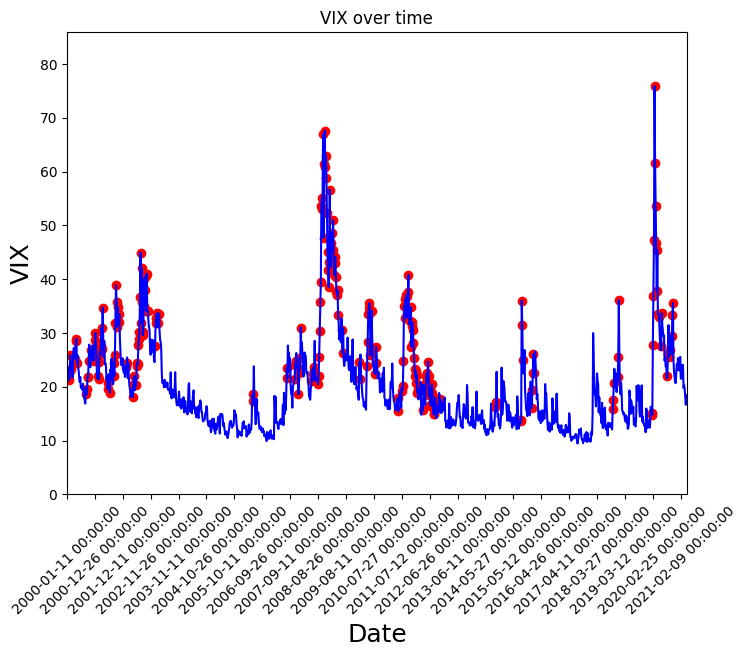

In [173]:
# Data Visualizations
# plot anomalies with respect to VIX over time

plt.figure(figsize=(8,6))
plt.xlim(0, df.shape[0])
plt.ylim(0, df['VIX'].max() + 10)
plt.plot(df['VIX'], color='blue', label='VIX')
plt.scatter(df[df['Y'] == 1].index, df[df['Y'] == 1]['VIX'], color='red', label='Anomaly')
plt.title('VIX over time')
plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation = 45)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('VIX', fontsize = 18)
plt.show()


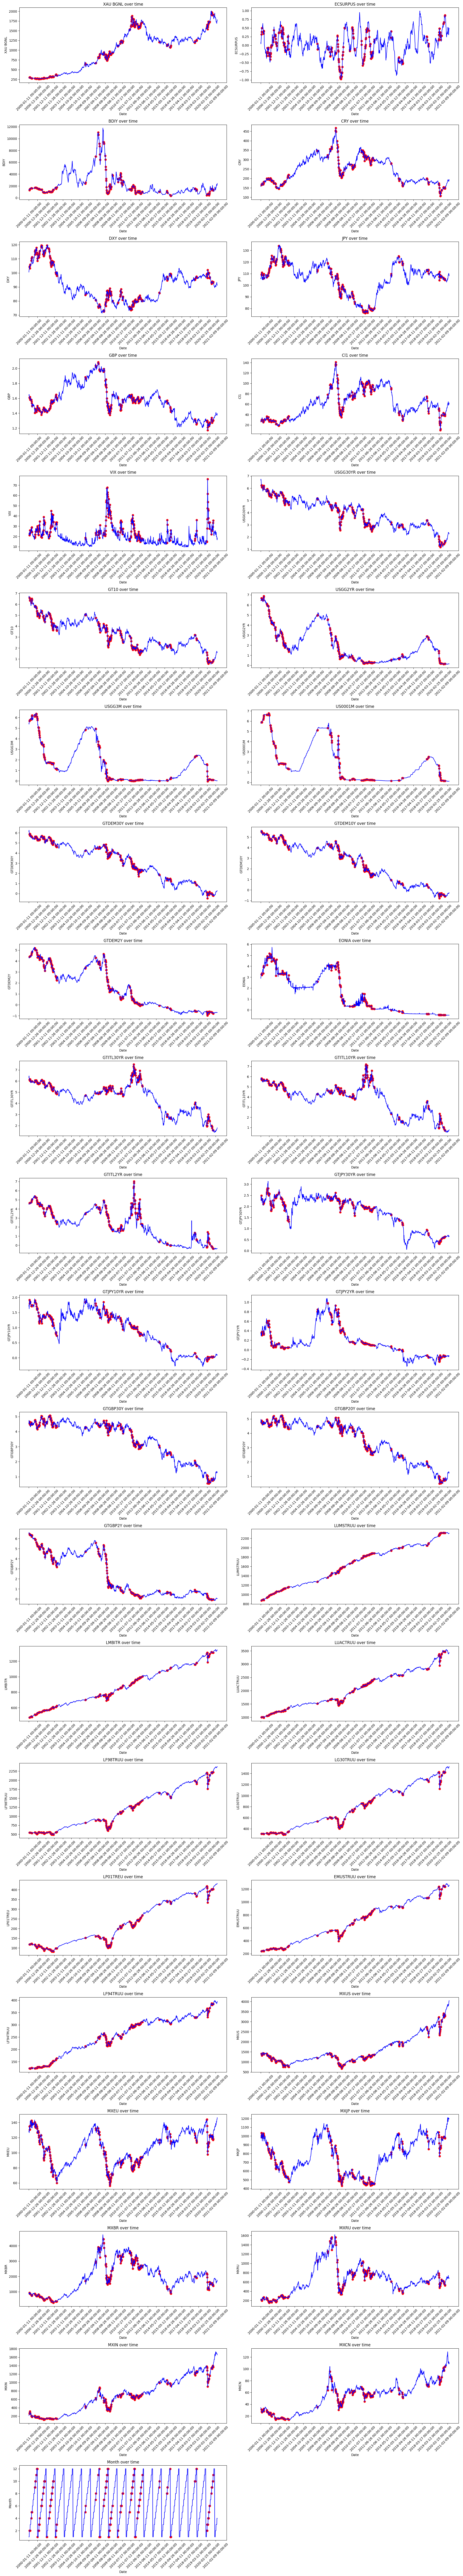

In [186]:
# Plot features variation wrt dates and Anomalies markers
# Set the grid dimensions
num_columns = 2  # number of plots per row
num_rows = (len(df.columns)+num_columns -1) // num_columns  #calculate the required rows

plt.figure(figsize=(20, 5 * num_rows))

# Loop through each column
for idx, column in enumerate(df.columns):
    if column == 'Date' or column == 'Y':
        continue

    plt.subplot(num_rows, num_columns, idx + 1)
    plt.plot(df[column], label=column, color='blue')
    plt.title(f"{column} over time")

    plt.scatter(
        df[df['Y'] == 1].index,  # X-axis is the index of the anomalies
        df[df['Y'] == 1][column],  # Y-axis is the value of the column for anomalies
        color='red',
        label='Anomaly'
    )
    plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation=45)
    plt.xlabel("Date", fontsize=10)
    plt.ylabel(column, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [182]:
# Correlation Matrix to drop highly correlated columns
correlation_matrix = df.corr()
strong_correlations = correlation_matrix[(correlation_matrix.abs()> 0.8) & (correlation_matrix != 1)]
strong_correlations[['GT10', 'USGG30YR',  'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM10Y', 'GTDEM30Y', 'GTDEM2Y', 'GTITL10YR', 'GTITL2YR', 'GTJPY30YR', 'GTJPY10YR', 'GTJPY2YR']]

GT10  USGG30YR   USGG2YR    USGG3M   US0001M  GTDEM10Y  \
Y               NaN       NaN       NaN       NaN       NaN       NaN   
Date      -0.881477 -0.932811       NaN       NaN       NaN -0.966089   
XAU BGNL  -0.893317 -0.868696       NaN       NaN       NaN -0.835680   
ECSURPUS        NaN       NaN       NaN       NaN       NaN       NaN   
BDIY            NaN       NaN       NaN       NaN       NaN       NaN   
CRY             NaN       NaN       NaN       NaN       NaN       NaN   
DXY             NaN       NaN       NaN       NaN       NaN       NaN   
JPY             NaN       NaN       NaN       NaN       NaN       NaN   
GBP             NaN       NaN       NaN       NaN       NaN       NaN   
Cl1             NaN       NaN       NaN       NaN       NaN       NaN   
VIX             NaN       NaN       NaN       NaN       NaN       NaN   
USGG30YR   0.966501       NaN       NaN       NaN       NaN  0.957880   
GT10            NaN  0.966501  0.852491       NaN       NaN  0.907444   
USGG2YR    0.852491       NaN       NaN  0.974560  0.958142       NaN   
USGG3M          NaN       NaN  0.974560       NaN  0.983098       NaN   
US0001M         NaN       NaN  0.958142  0.983098       NaN       NaN   
GTDEM30Y   0.887877  0.955222       NaN       NaN       NaN  0.994222   
GTDEM10Y   0.907444  0.957880       NaN       NaN       NaN       NaN   
GTDEM2Y    0.911950  0.905283       NaN       NaN       NaN  0.951400   
EONIA      0.851720  0.838987       NaN       NaN       NaN  0.900212   
GTITL30YR       NaN       NaN       NaN       NaN       NaN       NaN   
GTITL10YR       NaN       NaN       NaN       NaN       NaN  0.811122   
GTITL2YR        NaN       NaN       NaN       NaN       NaN  0.865326   
GTJPY30YR       NaN  0.825087       NaN       NaN       NaN  0.881734   
GTJPY10YR  0.824117  0.865517       NaN       NaN       NaN  0.927757   
GTJPY2YR        NaN       NaN       NaN       NaN       NaN       NaN   
GTGBP30Y   0.808524  0.908981       NaN       NaN       NaN  0.945809   
GTGBP20Y   0.849585  0.930560       NaN       NaN       NaN  0.966719   
GTGBP2Y    0.924134  0.879671  0.851612       NaN  0.805371  0.886724   
LUMSTRUU  -0.922826 -0.947958       NaN       NaN       NaN -0.964493   
LMBITR    -0.896944 -0.946674       NaN       NaN       NaN -0.979988   
LUACTRUU  -0.894717 -0.942009       NaN       NaN       NaN -0.975891   
LF98TRUU  -0.836249 -0.899607       NaN       NaN       NaN -0.962520   
LG30TRUU  -0.842266 -0.900582       NaN       NaN       NaN -0.962746   
LP01TREU  -0.811839 -0.881795       NaN       NaN       NaN -0.962813   
EMUSTRUU  -0.875720 -0.926959       NaN       NaN       NaN -0.969489   
LF94TRUU  -0.896057 -0.924378       NaN       NaN       NaN -0.935895   
MXUS            NaN       NaN       NaN       NaN       NaN -0.822086   
MXEU            NaN       NaN       NaN       NaN       NaN       NaN   
MXJP            NaN       NaN       NaN       NaN       NaN       NaN   
MXBR            NaN       NaN       NaN       NaN       NaN       NaN   
MXRU            NaN       NaN       NaN       NaN       NaN       NaN   
MXIN            NaN -0.856734       NaN       NaN       NaN -0.911087   
MXCN            NaN       NaN       NaN       NaN       NaN       NaN   
Month           NaN       NaN       NaN       NaN       NaN       NaN   

           GTDEM30Y   GTDEM2Y  GTITL10YR  GTITL2YR  GTJPY30YR  GTJPY10YR  \
Y               NaN       NaN        NaN       NaN        NaN        NaN   
Date      -0.966432 -0.914324        NaN -0.823784  -0.833647  -0.868718   
XAU BGNL  -0.828390 -0.837306        NaN       NaN        NaN        NaN   
ECSURPUS        NaN       NaN        NaN       NaN        NaN        NaN   
BDIY            NaN       NaN        NaN       NaN        NaN        NaN   
CRY             NaN       NaN        NaN       NaN        NaN        NaN   
DXY             NaN       NaN        NaN       NaN        NaN        NaN   
JPY             NaN       NaN        NaN       N

In [185]:
# MX indices correlation
strong_correlations[['MXUS', 'MXEU', 'MXIN', 'MXJP', 'MXCN','MXBR', 'MXRU', 'JPY', 'GBP']]

MXUS      MXEU      MXIN      MXJP      MXCN      MXBR  \
Y               NaN       NaN       NaN       NaN       NaN       NaN   
Date       0.833765       NaN  0.964150       NaN  0.872759       NaN   
XAU BGNL        NaN       NaN  0.831756       NaN  0.829659       NaN   
ECSURPUS        NaN       NaN       NaN       NaN       NaN       NaN   
BDIY            NaN       NaN       NaN       NaN       NaN       NaN   
CRY             NaN       NaN       NaN       NaN       NaN       NaN   
DXY             NaN       NaN       NaN       NaN       NaN       NaN   
JPY             NaN       NaN       NaN       NaN       NaN       NaN   
GBP             NaN       NaN       NaN       NaN       NaN       NaN   
Cl1             NaN       NaN       NaN       NaN       NaN  0.861036   
VIX             NaN       NaN       NaN       NaN       NaN       NaN   
USGG30YR        NaN       NaN -0.856734       NaN       NaN       NaN   
GT10            NaN       NaN       NaN       NaN       NaN       NaN   
USGG2YR         NaN       NaN       NaN       NaN       NaN       NaN   
USGG3M          NaN       NaN       NaN       NaN       NaN       NaN   
US0001M         NaN       NaN       NaN       NaN       NaN       NaN   
GTDEM30Y  -0.849187       NaN -0.922686       NaN       NaN       NaN   
GTDEM10Y  -0.822086       NaN -0.911087       NaN       NaN       NaN   
GTDEM2Y         NaN       NaN -0.823801       NaN       NaN       NaN   
EONIA           NaN       NaN       NaN       NaN       NaN       NaN   
GTITL30YR -0.813765       NaN       NaN       NaN       NaN       NaN   
GTITL10YR -0.802246       NaN       NaN       NaN       NaN       NaN   
GTITL2YR        NaN       NaN       NaN       NaN       NaN       NaN   
GTJPY30YR -0.829098       NaN -0.803069       NaN       NaN       NaN   
GTJPY10YR -0.802751       NaN -0.819250       NaN       NaN       NaN   
GTJPY2YR        NaN       NaN       NaN       NaN       NaN       NaN   
GTGBP30Y  -0.914225       NaN -0.892306       NaN       NaN       NaN   
GTGBP20Y  -0.887872       NaN -0.892992       NaN       NaN       NaN   
GTGBP2Y         NaN       NaN       NaN       NaN       NaN       NaN   
LUMSTRUU        NaN       NaN  0.942418       NaN  0.858844       NaN   
LMBITR     0.855661       NaN  0.960262       NaN  0.854112       NaN   
LUACTRUU   0.872598       NaN  0.956116       NaN  0.852678       NaN   
LF98TRUU   0.901542       NaN  0.968047       NaN  0.861071       NaN   
LG30TRUU   0.882772       NaN  0.969352       NaN  0.866942       NaN   
LP01TREU   0.894988       NaN  0.959300       NaN  0.836729       NaN   
EMUSTRUU   0.857983       NaN  0.968014       NaN  0.874616       NaN   
LF94TRUU        NaN       NaN  0.942966       NaN  0.887483       NaN   
MXUS            NaN       NaN  0.891200       NaN       NaN       NaN   
MXEU            NaN       NaN       NaN  0.894194       NaN       NaN   
MXJP            NaN  0.894194       NaN       NaN       NaN       NaN   
MXBR            NaN       NaN       NaN       NaN       NaN       NaN   
MXRU            NaN       NaN       NaN       NaN       NaN  0.814317   
MXIN       0.891200       NaN       NaN       NaN  0.935359       NaN   
MXCN            NaN       NaN  0.935359       NaN       NaN       NaN   
Month           NaN       NaN       NaN       NaN       NaN       NaN   

               MXRU  JPY  GBP  
Y               NaN  NaN  NaN  
Date            NaN  NaN  NaN  
XAU BGNL        NaN  NaN  NaN  
ECSURPUS        NaN  NaN  NaN  
BDIY            NaN  NaN  NaN  
CRY             NaN  NaN  NaN  
DXY             NaN  NaN  NaN  
JPY             NaN  NaN  NaN  
GBP             NaN  NaN  NaN  
Cl1             NaN  NaN  NaN  
VIX             NaN  NaN  NaN  
USGG30YR        NaN  NaN  NaN  
GT10            NaN  NaN  NaN  
USGG2YR         NaN  NaN  NaN  
USGG3M          NaN  NaN  NaN  
US0001M         NaN  NaN  NaN  
GTDEM30Y        NaN  NaN  NaN  
GTDEM10Y        NaN  NaN  NaN  
GTDEM2Y         NaN  NaN  NaN  
EONIA           

Dropping JPY and GBP- as they are more reactive to the market than proactive.


In [28]:
# Create the features and target variable
# Dropping columns that are not required as per above graphs and correlation matrix
features = df.drop(columns = ['Y', 'Date'])
selected_features = df.drop(columns=['Y', 'Date','ECSURPUS', 'GTGBP30Y','MXJP', 'MXRU','Cl1', 'JPY', 'GBP', 'USGG2YR', 'USGG3M', 'US0001M', 'GTDEM30Y', 'GTDEM10Y', 'GTDEM2Y', 'GTITL10YR', 'GTITL2YR', 'GTJPY10YR', 'GTJPY2YR', 'GTGBP20Y', 'GTGBP2Y', 'LUMSTRUU','LMBITR', 'LUACTRUU','LF98TRUU', 'LG30TRUU', 'EMUSTRUU', 'LF94TRUU', 'MXBR', 'MXCN', 'Month'])
target = df['Y']

In [30]:
selected_features.columns

Index(['XAU BGNL', 'BDIY', 'CRY', 'DXY', 'VIX', 'USGG30YR', 'GT10', 'EONIA',
       'GTITL30YR', 'GTJPY30YR', 'LP01TREU', 'MXUS', 'MXEU', 'MXIN'],
      dtype='object')

In [187]:
# Add exponential moving average for VIX, BDIY, DXY and moving averages for VIX, BDIY
selected_features['VIX_EMA'] = selected_features['VIX'].ewm(span=50, adjust=False).mean()
selected_features['BDIY_EMA'] = selected_features['BDIY'].ewm(span=50, adjust=False).mean()
selected_features['DXY_EMA'] = selected_features['DXY'].ewm(span=50, adjust=False).mean()
selected_features['VIX_MA'] = selected_features['VIX'].rolling(window=50).mean()
selected_features['BDIY_MA'] = selected_features['BDIY'].rolling(window=50).mean()

In [188]:
# Fill up rows that don't have sufficient window for moving average calculation
selected_features['VIX_MA'] = selected_features['VIX_MA'].fillna(selected_features['VIX'])
selected_features['BDIY_MA'] = selected_features['BDIY_MA'].fillna(selected_features['BDIY'])

## Install Libraries

In [33]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
import shap

In [34]:
!pip install --upgrade scikit-learn
!pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [35]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

## Train Test Splits


In [189]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42, shuffle = False)

In [190]:
X_train

XAU BGNL    BDIY      CRY     DXY    VIX  USGG30YR   GT10  EONIA  \
0      283.25  1388.0  157.260  100.56  22.50     6.671  6.657  2.890   
1      287.65  1405.0  165.010  101.86  21.50     6.747  6.748  3.030   
2      287.15  1368.0  167.240  102.41  23.02     6.634  6.692  3.150   
3      282.75  1311.0  166.850  104.92  23.45     6.423  6.619  3.300   
4      298.40  1277.0  165.430  104.22  21.25     6.231  6.613  3.260   
..        ...     ...      ...     ...    ...       ...    ...    ...   
883   1156.94  1052.0  193.457  101.07  12.72     3.131  2.472 -0.348   
884   1132.53   914.0  190.567  103.29  11.45     3.140  2.560 -0.354   
885   1137.42   961.0  192.753  103.02  11.99     3.133  2.561 -0.356   
886   1162.11   953.0  190.146  103.21  12.85     3.046  2.445 -0.329   
887   1184.36   926.0  191.139  102.01  11.49     2.968  2.377 -0.356   

     GTITL30YR  GTJPY30YR  LP01TREU     MXUS    MXEU    MXIN    VIX_EMA  \
0        6.321      2.422   116.464  1416.12  127.75  217.34  22.500000   
1        6.459      2.418   117.267  1428.79  129.50  227.08  22.460784   
2        6.281      2.259   117.995  1385.93  126.48  233.00  22.482714   
3        6.188      2.330   120.510  1385.31  129.19  237.48  22.520647   
4        6.118      2.481   118.791  1411.95  134.67  258.02  22.470818   
..         ...        ...       ...      ...     ...     ...        ...   
883      2.999      0.802   357.731  2160.59  121.19  991.10  15.236567   
884      2.890      0.661   358.686  2159.33  122.53  972.95  15.088074   
885      2.899      0.679   358.425  2157.75  122.17  962.00  14.966581   
886      3.014      0.716   360.116  2147.47  123.92  986.31  14.883578   
887      3.062      0.747   359.762  2160.18  123.36  998.01  14.750496   

        BDIY_EMA     DXY_EMA   VIX_MA  BDIY_MA  
0    1388.000000  100.560000  22.5000  1388.00  
1    1388.666667  100.610980  21.5000  1405.00  
2    1387.856209  100.681530  23.0200  1368.00  
3    1384.842240  100.847745  23.4500  1311.00  
4    1380.613133  100.979990  21.2500  1277.00  
..           ...         ...      ...      ...  
883   787.209552   96.917462  16.0452   664.64  
884   792.181727   97.167366  15.8874   673.56  
885   798.802051   97.396881  15.6778   684.74  
886   804.849030   97.624846  15.4138   696.54  
887   809.600048   97.796813  15.1936   708.16  

[888 rows x 19 columns]

In [191]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [39]:
#save the scaler used for train data
with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)

In [192]:
X_train_scaled.shape

(888, 19)

In [193]:
# Standardize the validation and test sets
X_test_scaled = scaler.transform(X_test)

In [42]:
type(X_test_scaled)

numpy.ndarray

In [194]:
# Apply PCA to the train set and transform the validation and test sets
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)

In [44]:
# Save the pca
with open('pca.pkl', 'wb') as file:
  pickle.dump(pca, file)

In [195]:
# explained variance ratio: how much info can be attributed to each principal component
pca.explained_variance_ratio_

array([0.40693218, 0.23759097, 0.18087401, 0.06210467, 0.04139473])

In [196]:
# Add raw scaled features to the PCA components to improve model performance
# Adding VIX, BDIY, VIX_EMA, BDIY_EMA, DXY_EMA, VIX_MA, BDIY_MA
selected_columns = np.hstack((X_train_scaled[:, [4]], X_train_scaled[:, -5:]))
# X_train_pca = np.hstack((X_train_pca, X_train_scaled[:, -3:]))
X_train_pca = np.hstack((X_train_pca, selected_columns))

In [47]:
X_train_pca.shape

(888, 11)

In [197]:
# Transform test set
X_test_pca = pca.transform(X_test_scaled)

In [198]:
# Add raw scaled features to the PCA components to improve model performance
selected_columns_test = np.hstack((X_test_scaled[:, [4]], X_test_scaled[:, -5:]))
# X_test_pca = np.hstack((X_test_pca, X_test_scaled[:, -3:]))
X_test_pca = np.hstack((X_test_pca, selected_columns_test))

In [50]:
X_test_pca.shape

(223, 11)

In [199]:
# Evaluate and save model
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, model_filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("-------------")
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report: \n{classification_report(y_test, y_pred)}")
  print("-------------")

  #use pickle to save the model
  with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

  print(f"Model saved as {model_filename}")

## Logistic Regression

In [52]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_pca, y_train)
y_pred = lr_model.predict(X_test_pca)

In [53]:
evaluate_and_save_model(lr_model, X_train_pca, X_test_pca, y_train, y_test, 'lr_model.pkl')

-------------
LogisticRegression Accuracy: 0.8924

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       194
           1       0.58      0.66      0.61        29

    accuracy                           0.89       223
   macro avg       0.76      0.79      0.78       223
weighted avg       0.90      0.89      0.90       223

-------------



## Isolation Forest (without feature engineering)

In [200]:
# Unsupervised
iso_scaled = StandardScaler()
selected_features_scaled = iso_scaled.fit_transform(selected_features)

In [56]:
forest = IsolationForest(random_state=42, n_estimators=100, contamination=0.2, max_samples='auto')
forest.fit(selected_features_scaled)

IsolationForest(contamination=0.2, random_state=42)

In [201]:
scores = forest.score_samples(selected_features_scaled)

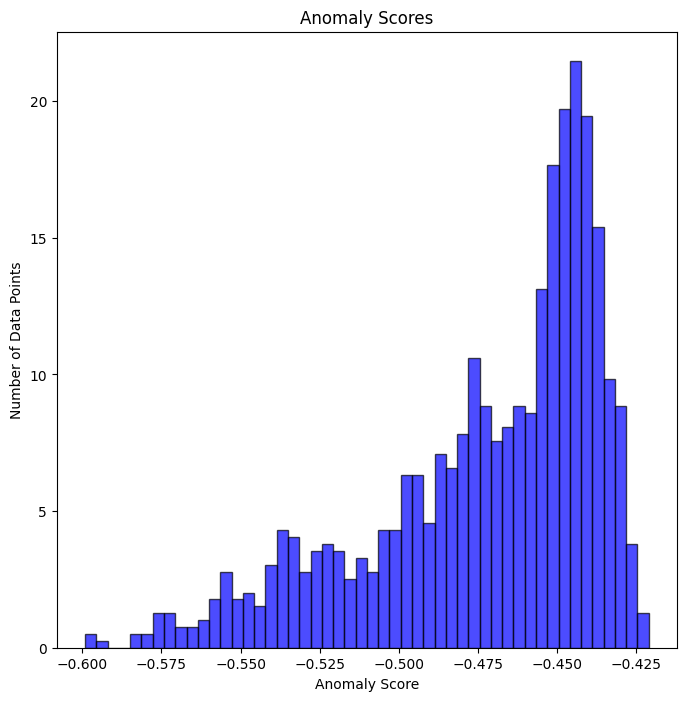

In [58]:
# plot histogram for the anomaly scores for the datapoints
plt.figure(figsize=(8,8))
plt.hist(scores, bins=50, color='blue', edgecolor='black', density=True, alpha=0.7)
plt.title('Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Data Points')
plt.show()



In [61]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [202]:
y_pred = (forest.predict(selected_features_scaled) == -1).astype(int)
y_true = np.array(df['Y'])
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       874
           1       0.45      0.42      0.44       237

    accuracy                           0.77      1111
   macro avg       0.65      0.64      0.64      1111
weighted avg       0.76      0.77      0.76      1111



In [203]:
# Adding results to the dataframe for visualizations
isoforest_features = selected_features.copy()
isoforest_features['Anomaly'] = y_true
isoforest_features['Anomaly_scaled'] = y_pred

In [64]:
isoforest_features['Anomaly_scaled'].value_counts()

Anomaly_scaled
0    889
1    222
Name: count, dtype: int64

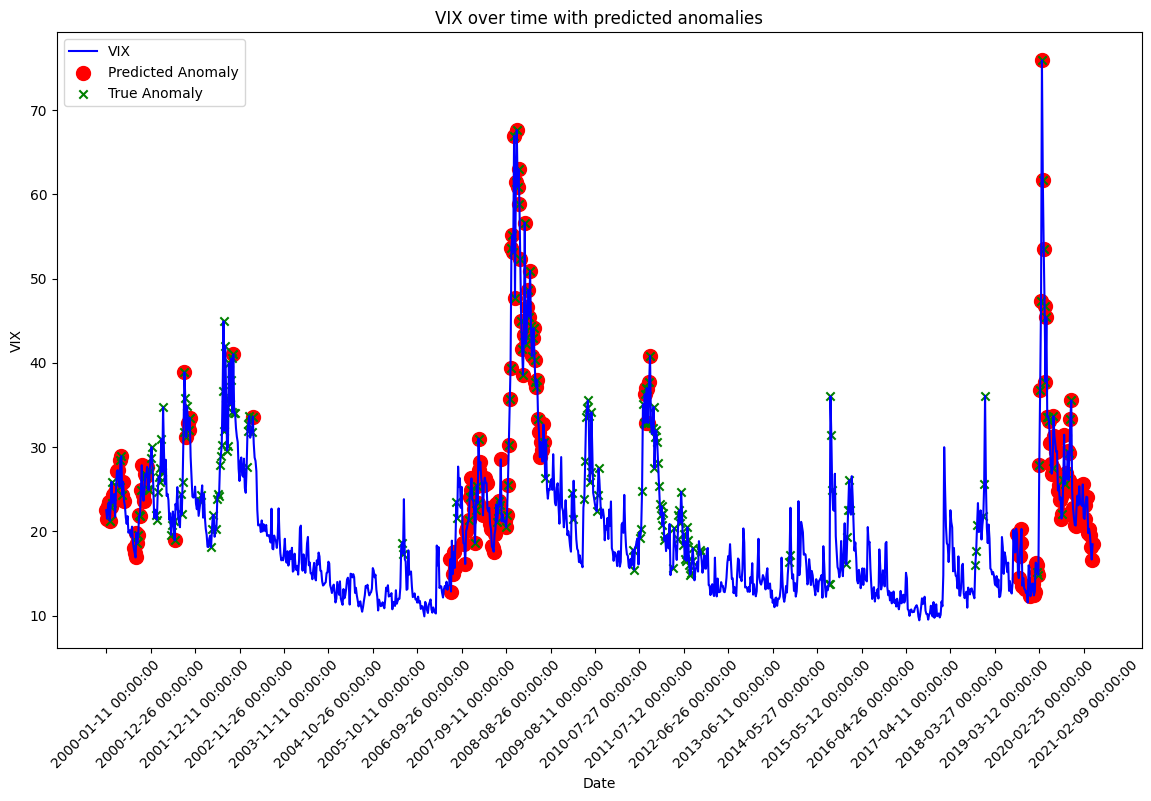

In [65]:
plt.figure(figsize=(14,8))
plt.plot(isoforest_features['VIX'], label='VIX', color='blue')
plt.title(f"VIX over time with predicted anomalies")

plt.scatter(
    isoforest_features[isoforest_features['Anomaly_scaled'] == 1].index,  # X-axis is the index of the anomalies
    isoforest_features[isoforest_features['Anomaly_scaled'] == 1]['VIX'],  # Y-axis is the value of the column for anomalies
    color='red',
    label='Predicted Anomaly',
    s = 100
)
plt.scatter(
    df[df['Y'] == 1].index,  # X-axis is the index of the anomalies
    df[df['Y'] == 1]['VIX'],  # Y-axis is the value of the column for anomalies
    color='green',
    label='True Anomaly',
    marker = 'x',
)

plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation=45)
plt.xlabel("Date", fontsize=10)
plt.ylabel('VIX', fontsize=10)
plt.legend()
plt.show()

In [66]:
# Naive Anomaly
isoforest_features['Naive Anomaly'] = (isoforest_features['VIX'] > 25).astype(int)
print(isoforest_features['Naive Anomaly'].value_counts())
print(isoforest_features['Anomaly_scaled'].value_counts())



Naive Anomaly
0    887
1    224
Name: count, dtype: int64
Anomaly_scaled
0    889
1    222
Name: count, dtype: int64


In [67]:
isoforest_features.head()

XAU BGNL    BDIY     CRY     DXY    VIX  USGG30YR   GT10  EONIA  GTITL30YR  \
0    283.25  1388.0  157.26  100.56  22.50     6.671  6.657   2.89      6.321   
1    287.65  1405.0  165.01  101.86  21.50     6.747  6.748   3.03      6.459   
2    287.15  1368.0  167.24  102.41  23.02     6.634  6.692   3.15      6.281   
3    282.75  1311.0  166.85  104.92  23.45     6.423  6.619   3.30      6.188   
4    298.40  1277.0  165.43  104.22  21.25     6.231  6.613   3.26      6.118   

   GTJPY30YR  ...    MXEU    MXIN    VIX_EMA     BDIY_EMA     DXY_EMA  VIX_MA  \
0      2.422  ...  127.75  217.34  22.500000  1388.000000  100.560000   22.50   
1      2.418  ...  129.50  227.08  22.460784  1388.666667  100.610980   21.50   
2      2.259  ...  126.48  233.00  22.482714  1387.856209  100.681530   23.02   
3      2.330  ...  129.19  237.48  22.520647  1384.842240  100.847745   23.45   
4      2.481  ...  134.67  258.02  22.470818  1380.613133  100.979990   21.25   

   BDIY_MA  Anomaly  Anomaly_scaled  Naive Anomaly  
0   1388.0        0               1              0  
1   1405.0        0               1              0  
2   1368.0        0               1              0  
3   1311.0        0               1              0  
4   1277.0        1               1              0  

[5 rows x 22 columns]

## Isolation Forest (with PCA)

In [68]:
# PCA of original data set : selected features
pca_features = PCA(n_components=0.9)
selected_features_pca = pca_features.fit_transform(selected_features_scaled)
selected_features_pca.shape

(1111, 4)

In [69]:
# Save pca with pickle
with open('pca_isoforest.pkl', 'wb') as file:
  pickle.dump(pca_features, file)

In [70]:
# Adding raw features to pca for better performance
selected = np.hstack((selected_features_scaled[:, [4]], selected_features_scaled[:, -5:]))
selected_features_pca = np.hstack((selected_features_pca, selected))

In [71]:
selected_features_pca.shape

(1111, 10)

In [72]:
isoforest_scaled_features = IsolationForest(random_state=42, n_estimators=100, contamination=0.2, max_samples='auto')
isoforest_scaled_features.fit(selected_features_pca)

pred_test_pca = isoforest_scaled_features.predict(selected_features_pca)
pred_test_pca = pred_test_pca.reshape(-1, 1)

isoforest_features['Anomaly_pca'] = pred_test_pca
isoforest_features['Anomaly_pca'] = isoforest_features['Anomaly_pca'].replace({1:0, -1:1})


In [73]:
y_pred_pca = (isoforest_scaled_features.predict(selected_features_pca) == -1).astype(int)
print(classification_report(y_true, y_pred_pca))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       874
           1       0.45      0.42      0.43       237

    accuracy                           0.77      1111
   macro avg       0.65      0.64      0.64      1111
weighted avg       0.76      0.77      0.76      1111



In [74]:
# Save the Isolation forest model:
with open('isoforest_model.pkl', 'wb') as file:
  pickle.dump(isoforest_scaled_features, file)

In [75]:
isoforest_features['Anomaly_pca'].value_counts()

Anomaly_pca
0    889
1    222
Name: count, dtype: int64

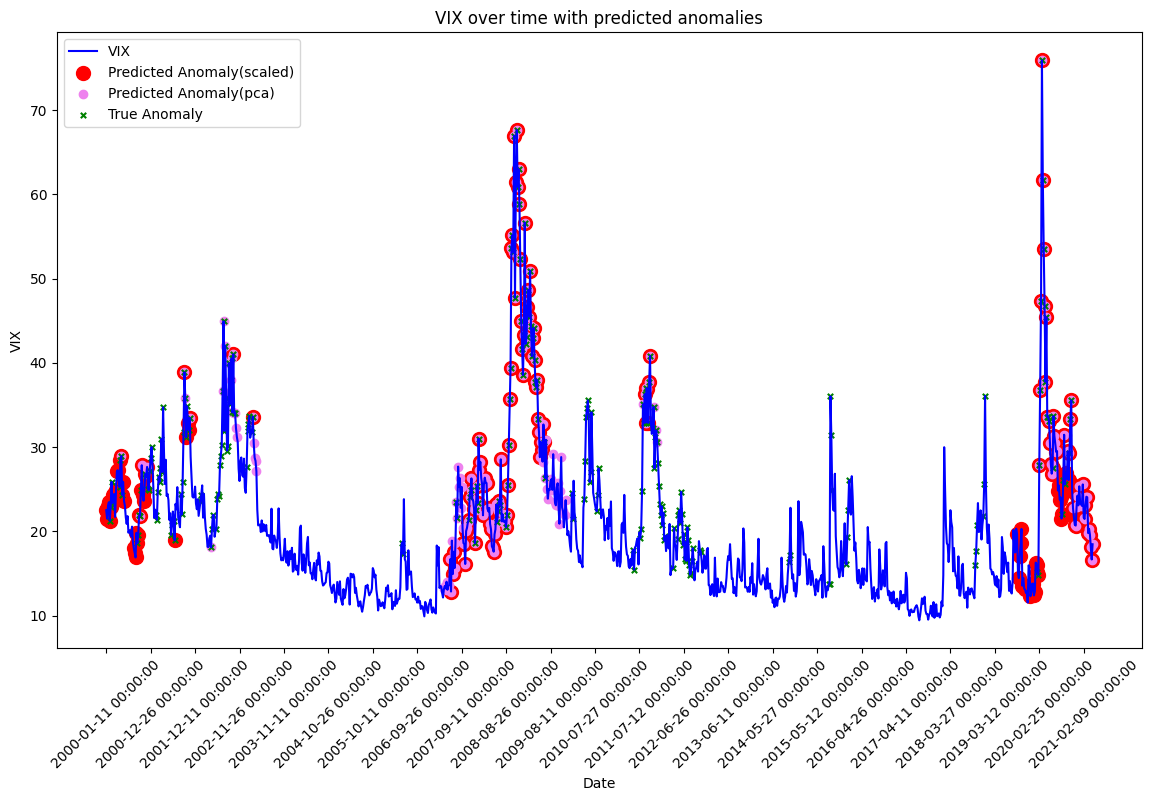

In [76]:
plt.figure(figsize=(14,8))
plt.plot(isoforest_features['VIX'], label='VIX', color='blue')
plt.title(f"VIX over time with predicted anomalies")

plt.scatter(
    isoforest_features[isoforest_features['Anomaly_scaled'] == 1].index,  # X-axis is the index of the anomalies
    isoforest_features[isoforest_features['Anomaly_scaled'] == 1]['VIX'],  # Y-axis is the value of the column for anomalies
    color='red',
    label='Predicted Anomaly(scaled)',
    s = 100
)
plt.scatter(
    isoforest_features[isoforest_features['Anomaly_pca'] == 1].index,  # X-axis is the index of the anomalies
    isoforest_features[isoforest_features['Anomaly_pca'] == 1]['VIX'],  # Y-axis is the value of the column for anomalies
    color='violet',
    label='Predicted Anomaly(pca)'
)
plt.scatter(
    df[df['Y'] == 1].index,  # X-axis is the index of the anomalies
    df[df['Y'] == 1]['VIX'],  # Y-axis is the value of the column for anomalies
    color='green',
    label='True Anomaly',
    marker = 'x',
    s =15
)
plt.xticks(range(0, df.shape[0], 50), df['Date'].iloc[::50], rotation=45)
plt.xlabel("Date", fontsize=10)
plt.ylabel('VIX', fontsize=10)
plt.legend()
plt.show()

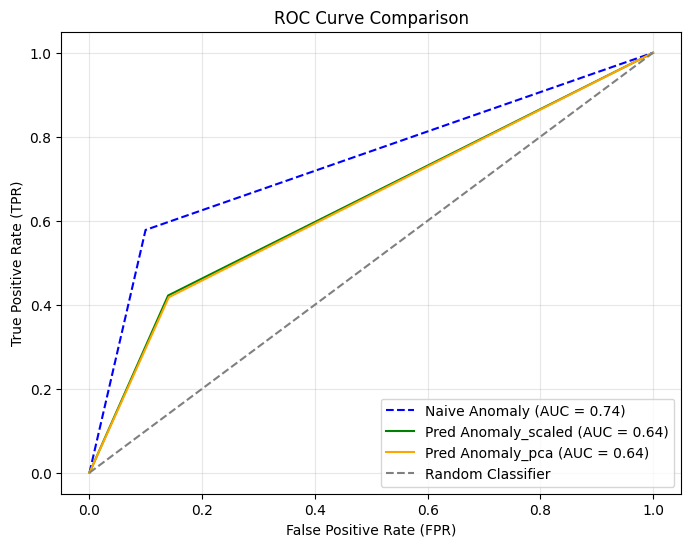

In [77]:
# Compute ROC curve and AUC for naive anomaly
fpr_naive, tpr_naive, _ = roc_curve(isoforest_features['Anomaly'], isoforest_features['Naive Anomaly'])
auc_naive = auc(fpr_naive, tpr_naive)

# Compute ROC curve and AUC for pred_anomaly (scaled)
fpr_pred_scaled, tpr_pred_scaled, _ = roc_curve(isoforest_features['Anomaly'], isoforest_features['Anomaly_scaled'])
auc_pred_scaled = auc(fpr_pred_scaled, tpr_pred_scaled)

# Compute ROC curve and AUC for pred_anomaly (pca)
fpr_pred_pca, tpr_pred_pca, _ = roc_curve(isoforest_features['Anomaly'], isoforest_features['Anomaly_pca'])
auc_pred_pca = auc(fpr_pred_pca, tpr_pred_pca)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_naive, tpr_naive, label=f'Naive Anomaly (AUC = {auc_naive:.2f})', linestyle='--', color='blue')
plt.plot(fpr_pred_scaled, tpr_pred_scaled, label=f'Pred Anomaly_scaled (AUC = {auc_pred_scaled:.2f})', color='green')
plt.plot(fpr_pred_pca, tpr_pred_pca, label=f'Pred Anomaly_pca (AUC = {auc_pred_pca:.2f})', color='orange')

# Plot reference line for random classifier
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Customize the plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

ExactExplainer explainer: 1112it [09:30,  1.94it/s]


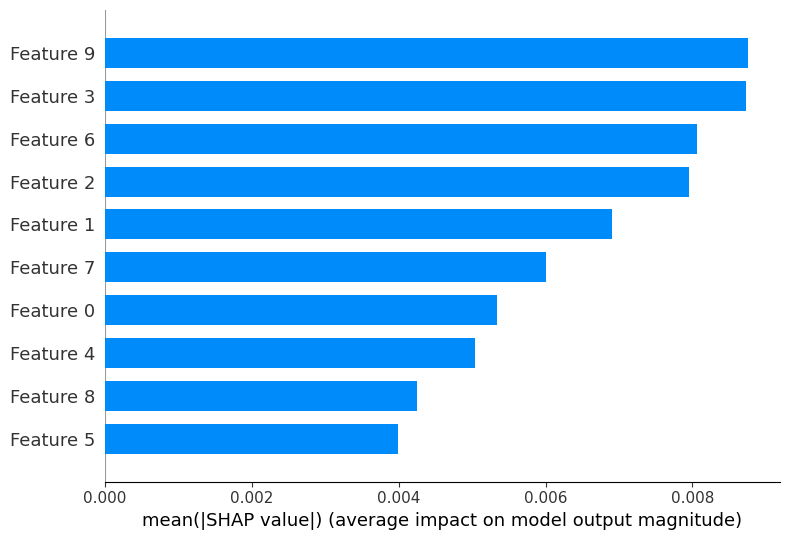

In [79]:
# SHAP explainer for the Isolation Forest
explainer = shap.Explainer(isoforest_scaled_features.decision_function, selected_features_pca)
shap_values = explainer(selected_features_pca)

# Visualize feature importance
shap.summary_plot(shap_values,selected_features_pca, plot_type="bar")

## Xgboost


In [204]:
# Apply Hyperparameter tuning to XGB model
param_grid = {'learning_rate': [0.01, 0.1, 0.5, 0.9],
              'n_estimators': [100, 200, 300],
              'subsample': [0.3, 0.5, 0.9]}
xgb_model = xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 100)
xgb_tuned = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)

In [449]:
print("Best parameters found: ", xgb_tuned.best_params_)
print("Best score found: ", xgb_tuned.best_score_)

Best parameters found:  {'learning_rate': 0.01, 'n_estimators': 100, 'subsample': 0.3}
Best score found:  0.7804054054054054


In [208]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(learning_rate = 0.01, n_estimators = 100, subsample = 0.3)

In [212]:
# Train using scaled features
evaluate_and_save_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, 'xgb_model.pkl')

-------------
XGBClassifier Accuracy: 0.9372

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       194
           1       1.00      0.52      0.68        29

    accuracy                           0.94       223
   macro avg       0.97      0.76      0.82       223
weighted avg       0.94      0.94      0.93       223

-------------
Model saved as xgb_model.pkl


In [211]:
# Train using PCA components + raw scaled features
evaluate_and_save_model(xgb_model, X_train_pca, X_test_pca, y_train, y_test, 'xgb_model_pca.pkl')

-------------
XGBClassifier Accuracy: 0.9327

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       194
           1       0.94      0.52      0.67        29

    accuracy                           0.93       223
   macro avg       0.93      0.76      0.81       223
weighted avg       0.93      0.93      0.92       223

-------------
Model saved as xgb_model_pca.pkl


Scaled features show better performance than PCA.

Text(0.5, 1.0, 'Feature Importances')

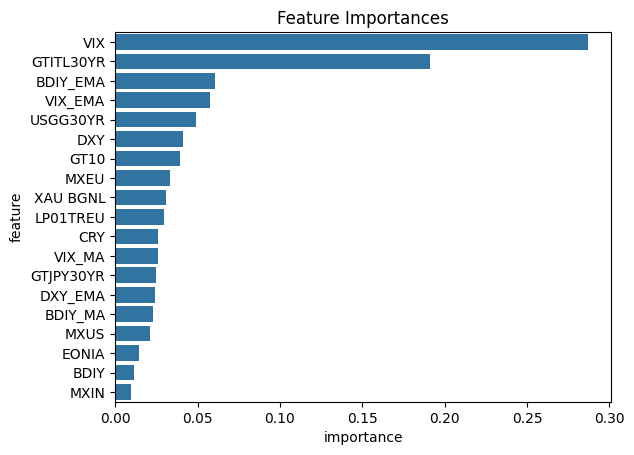

In [89]:
# Compute feature importances for XGB model
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns
feature_importances_df = pd.DataFrame(
    {'feature': feature_names,
     'importance': feature_importances}
)
feature_importances_df = feature_importances_df.sort_values(by="importance", ascending = False)
sns.barplot(x="importance", y="feature", data=feature_importances_df)
plt.title("Feature Importances")

## Improve Performance:
- SMOTE
- Voting Classifier



In [213]:
# Initialize SMOTE
smote = SMOTE(random_state = 0)
X_resampled, y_resampled = smote.fit_resample(X_train_pca, y_train)


In [216]:
evaluate_and_save_model(xgb_model, X_resampled, X_test_pca, y_resampled, y_test, 'xgb_model_smote.pkl')

-------------
XGBClassifier Accuracy: 0.8610

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       194
           1       0.48      0.83      0.61        29

    accuracy                           0.86       223
   macro avg       0.73      0.85      0.76       223
weighted avg       0.91      0.86      0.88       223

-------------
Model saved as xgb_model_smote.pkl


In [91]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [143]:
#SVC model
svm_model = SVC(random_state = 42, kernel = 'rbf')
evaluate_and_save_model(svm_model, X_resampled, X_test_pca, y_resampled, y_test, 'svm_model.pkl')

-------------
SVC Accuracy: 0.8924

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       194
           1       0.58      0.62      0.60        29

    accuracy                           0.89       223
   macro avg       0.76      0.78      0.77       223
weighted avg       0.90      0.89      0.89       223

-------------


In [217]:
voting_clf = VotingClassifier(
    estimators = [('xgboost', xgb.XGBClassifier(random_state = 42)), ('rf', RandomForestClassifier(random_state = 42)), ('svm', SVC(random_state = 42, probability = True))],
    voting = 'soft'
)

In [218]:
evaluate_and_save_model(voting_clf, X_resampled, X_test_pca, y_resampled, y_test, 'voting_clf_model.pkl')

-------------
VotingClassifier Accuracy: 0.9013

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       194
           1       0.61      0.69      0.65        29

    accuracy                           0.90       223
   macro avg       0.78      0.81      0.79       223
weighted avg       0.91      0.90      0.90       223

-------------
Model saved as voting_clf_model.pkl


Voting classifier has the best f1-score of 65% along with recall of 69%.
However, SVM has f1-score of 60% and recall of 62%. (random_state = 0)

random_state= 3 voting- f1=61, recall=62, precision = 60

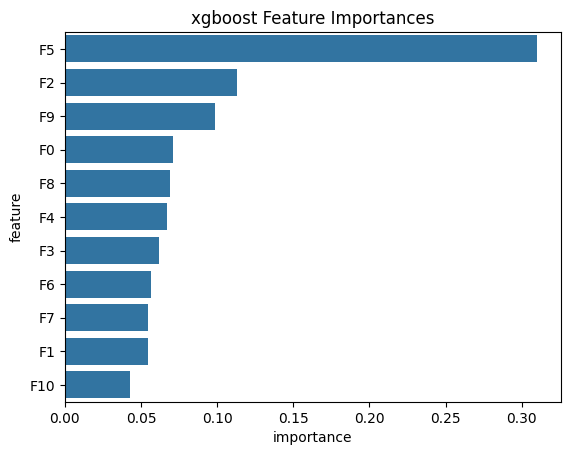

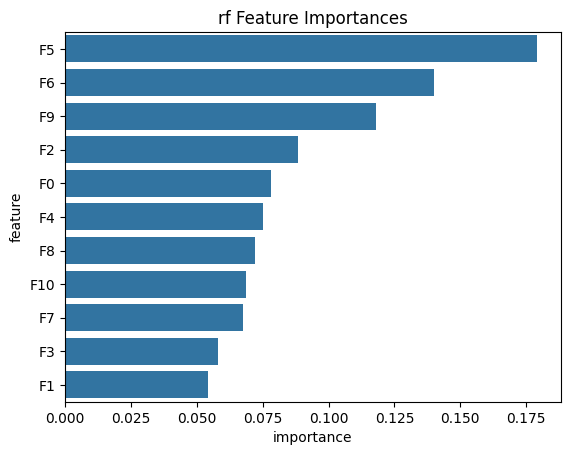

In [223]:
# Check the feature importances for each classifier in Voting Clf
feature_names = [f"F{i}" for i in range(X_train_pca.shape[1])]
for alg in voting_clf.named_estimators:
  if alg =='xgboost' or alg=='rf':
    clf = voting_clf.named_estimators[alg]
    clf.fit(X_resampled, y_resampled)
    feature_importances = clf.feature_importances_

    feature_importances_df = pd.DataFrame(
        {'feature': feature_names,
        'importance': feature_importances}
    )
    feature_importances_df = feature_importances_df.sort_values(by="importance", ascending = False)
    #separate bar plots for each
    plt.figure()
    sns.barplot(x="importance", y="feature", data=feature_importances_df)
    plt.title(f"{alg} Feature Importances")
    plt.show()

F5 -> VIX, the most important feature for both XGboost and Random Forest classifiers.

In [225]:
# Compute individual classifier accuracies
classifier_accuracies = []
for name, clf in voting_clf.named_estimators_.items():
    y_pred_individual = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred_individual)
    classifier_accuracies.append((name, accuracy))

# Print individual classifier accuracies
print("Individual Classifier Accuracies:")
for name, accuracy in classifier_accuracies:
    print(f"{name}: {accuracy:.4f}")

Individual Classifier Accuracies:
xgboost: 0.8565
rf: 0.8969
svm: 0.8924
